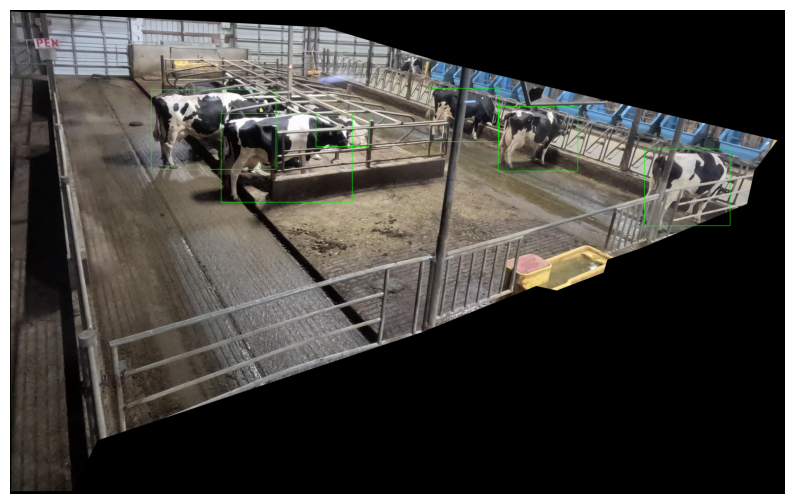

In [1]:
import cv2
import matplotlib.pyplot as plt

# Chemins
image_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\images\0725\cam_1\1690271846_02-57-26.jpg"
label_path = r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_1\1690271846_02-57-26.txt"

# Charger l'image
image = cv2.imread(image_path)
# OpenCV charge en BGR, on convertit en RGB pour matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape

# Lire le fichier d'annotations
with open(label_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    class_id = int(parts[0])
    center_x = float(parts[1]) * width
    center_y = float(parts[2]) * height
    bbox_width = float(parts[3]) * width
    bbox_height = float(parts[4]) * height

    # Calculer coin supérieur gauche et inférieur droit
    x1 = int(center_x - bbox_width / 2)
    y1 = int(center_y - bbox_height / 2)
    x2 = int(center_x + bbox_width / 2)
    y2 = int(center_y + bbox_height / 2)

    # Dessiner le rectangle en vert
    cv2.rectangle(image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)

    # Afficher le class_id en vert aussi
    cv2.putText(image, str(class_id), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Afficher le résultat
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()


In [13]:
import os

# Dossiers des caméras
folders = [
    r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_1",
    r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_2",
    r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_3",
    r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_4"
]

# Lire et trier tous les fichiers par timestamp
all_files = sorted([f for f in os.listdir(folders[0]) if f.endswith('.txt')])

# Extraire le timestamp Unix du début du nom
timestamps = [int(f.split('_')[0]) for f in all_files]

# Choisir des fichiers espacés d'au moins 3 minutes (180 s)
selected_files = []
last_ts = None
for fname, ts in zip(all_files, timestamps):
    if last_ts is None or ts - last_ts >= 360:
        selected_files.append(fname)
        last_ts = ts
    if len(selected_files) == 5:
        break

print(f"\n Selected {len(selected_files)} timestamps: {selected_files}")

# Lecture et intersection
for file_name in selected_files:
    print(f"\n Timestamp: {file_name}")
    cows_per_cam = []

    for i, folder in enumerate(folders, start=1):
        file_path = os.path.join(folder, file_name)

        if os.path.exists(file_path):
            with open(file_path, 'r') as f:
                lines = f.readlines()
                cow_ids = set(int(line.strip().split()[0]) for line in lines if line.strip())
        else:
            cow_ids = set()

        cows_per_cam.append(cow_ids)
        print(f"  → Cam {i}: {len(cow_ids)} cows → IDs: {sorted(cow_ids)}")

    # Intersection
    common_cows = set.intersection(*cows_per_cam)
    print(f" Intersection (present in all 4 cams): {len(common_cows)} cows → IDs: {sorted(common_cows)}")



 Selected 5 timestamps: ['1690271846_02-57-26.txt', '1690272206_03-03-26.txt', '1690272566_03-09-26.txt', '1690272926_03-15-26.txt', '1690273286_03-21-26.txt']

 Timestamp: 1690271846_02-57-26.txt
  → Cam 1: 6 cows → IDs: [1, 2, 5, 9, 12, 16]
  → Cam 2: 11 cows → IDs: [1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16]
  → Cam 3: 12 cows → IDs: [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 15, 16]
  → Cam 4: 10 cows → IDs: [1, 2, 4, 5, 7, 9, 10, 12, 13, 16]
 Intersection (present in all 4 cams): 5 cows → IDs: [1, 5, 9, 12, 16]

 Timestamp: 1690272206_03-03-26.txt
  → Cam 1: 8 cows → IDs: [1, 2, 5, 9, 11, 12, 13, 16]
  → Cam 2: 11 cows → IDs: [1, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16]
  → Cam 3: 13 cows → IDs: [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 15, 16]
  → Cam 4: 11 cows → IDs: [1, 2, 4, 5, 7, 9, 10, 11, 12, 13, 16]
 Intersection (present in all 4 cams): 6 cows → IDs: [1, 5, 9, 12, 13, 16]

 Timestamp: 1690272566_03-09-26.txt
  → Cam 1: 8 cows → IDs: [1, 2, 5, 9, 11, 12, 13, 16]
  → Cam 2: 11 cows → IDs: [1, 4, 5

In [17]:
import os

# Dossiers des labels des 4 caméras
folders = {
    "cam_1": r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_1",
    "cam_2": r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_2",
    "cam_3": r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_3",
    "cam_4": r"C:\Users\rouat\Desktop\MMcows\Datasets\visual_data\visual_data\labels\combined\0725\cam_4"
}

# Dictionnaire pour stocker le nombre total de vaches détectées (lignes .txt) par caméra
total_detections_per_cam = {}

for cam_name, cam_path in folders.items():
    total_cows = 0

    for file in os.listdir(cam_path):
        if file.endswith(".txt"):
            file_path = os.path.join(cam_path, file)
            with open(file_path, 'r') as f:
                lines = f.readlines()
                total_cows += len([line for line in lines if line.strip()])  # ne compter que les lignes non vides

    total_detections_per_cam[cam_name] = total_cows

#  Affichage des résultats
print("\n Total cow detections per camera (all .txt files):")
for cam, count in total_detections_per_cam.items():
    print(f"→ {cam}: {count} total detections")

#  Caméra avec le plus de détections
most_active_cam = max(total_detections_per_cam, key=total_detections_per_cam.get)
print(f"\n The camera with the most detections: {most_active_cam} ({total_detections_per_cam[most_active_cam]} detections)")



 Total cow detections per camera (all .txt files):
→ cam_1: 53508 total detections
→ cam_2: 54813 total detections
→ cam_3: 53878 total detections
→ cam_4: 51506 total detections

 The camera with the most detections: cam_2 (54813 detections)
